In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes (2).csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(df.isnull().sum())

np.int64(0)

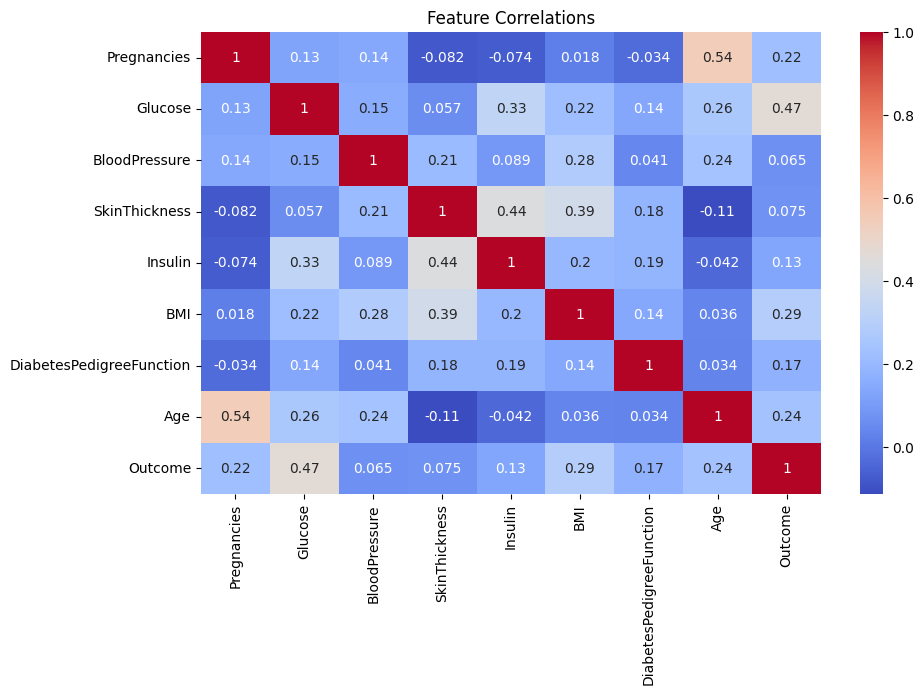

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

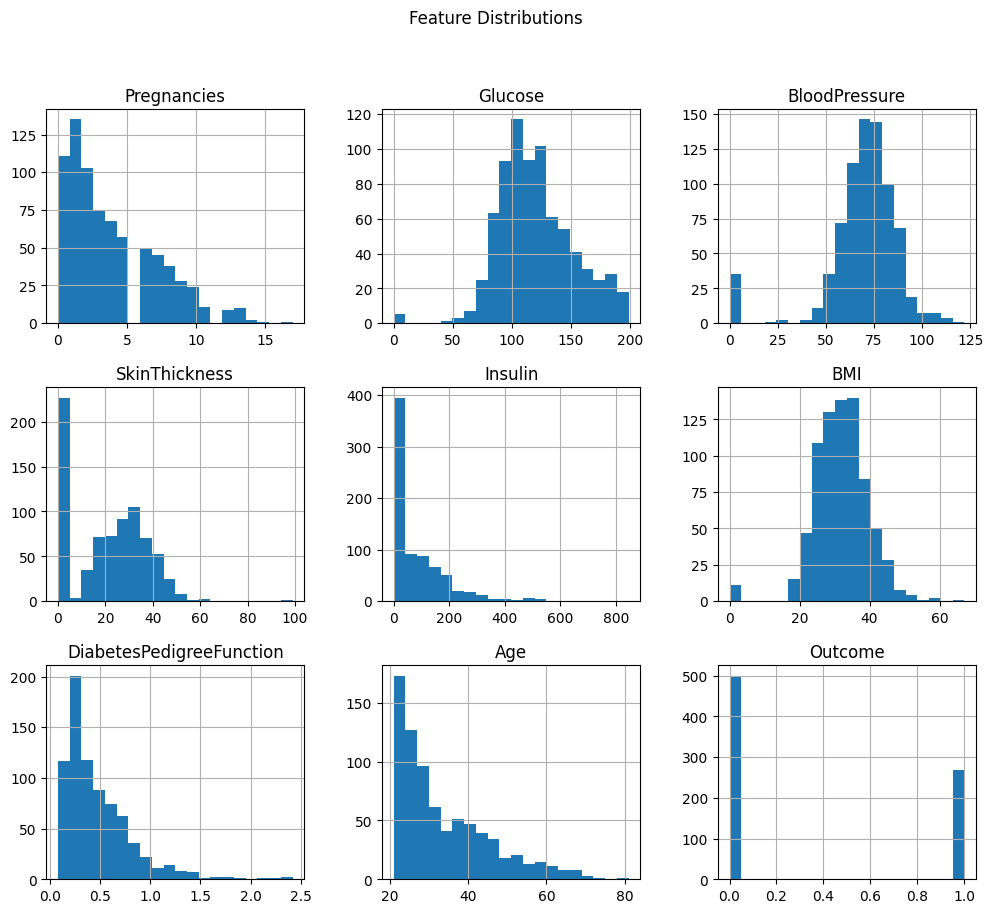

In [12]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

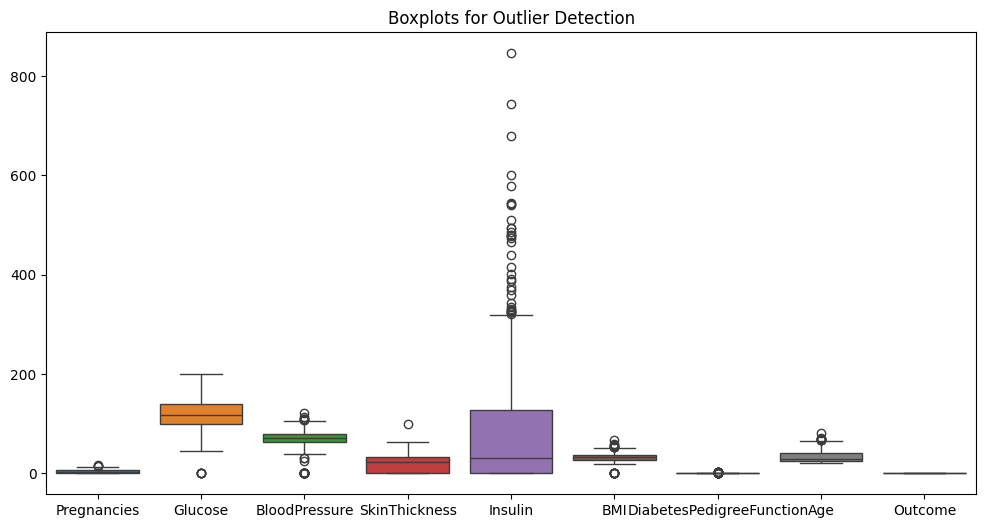

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots for Outlier Detection")
plt.show()

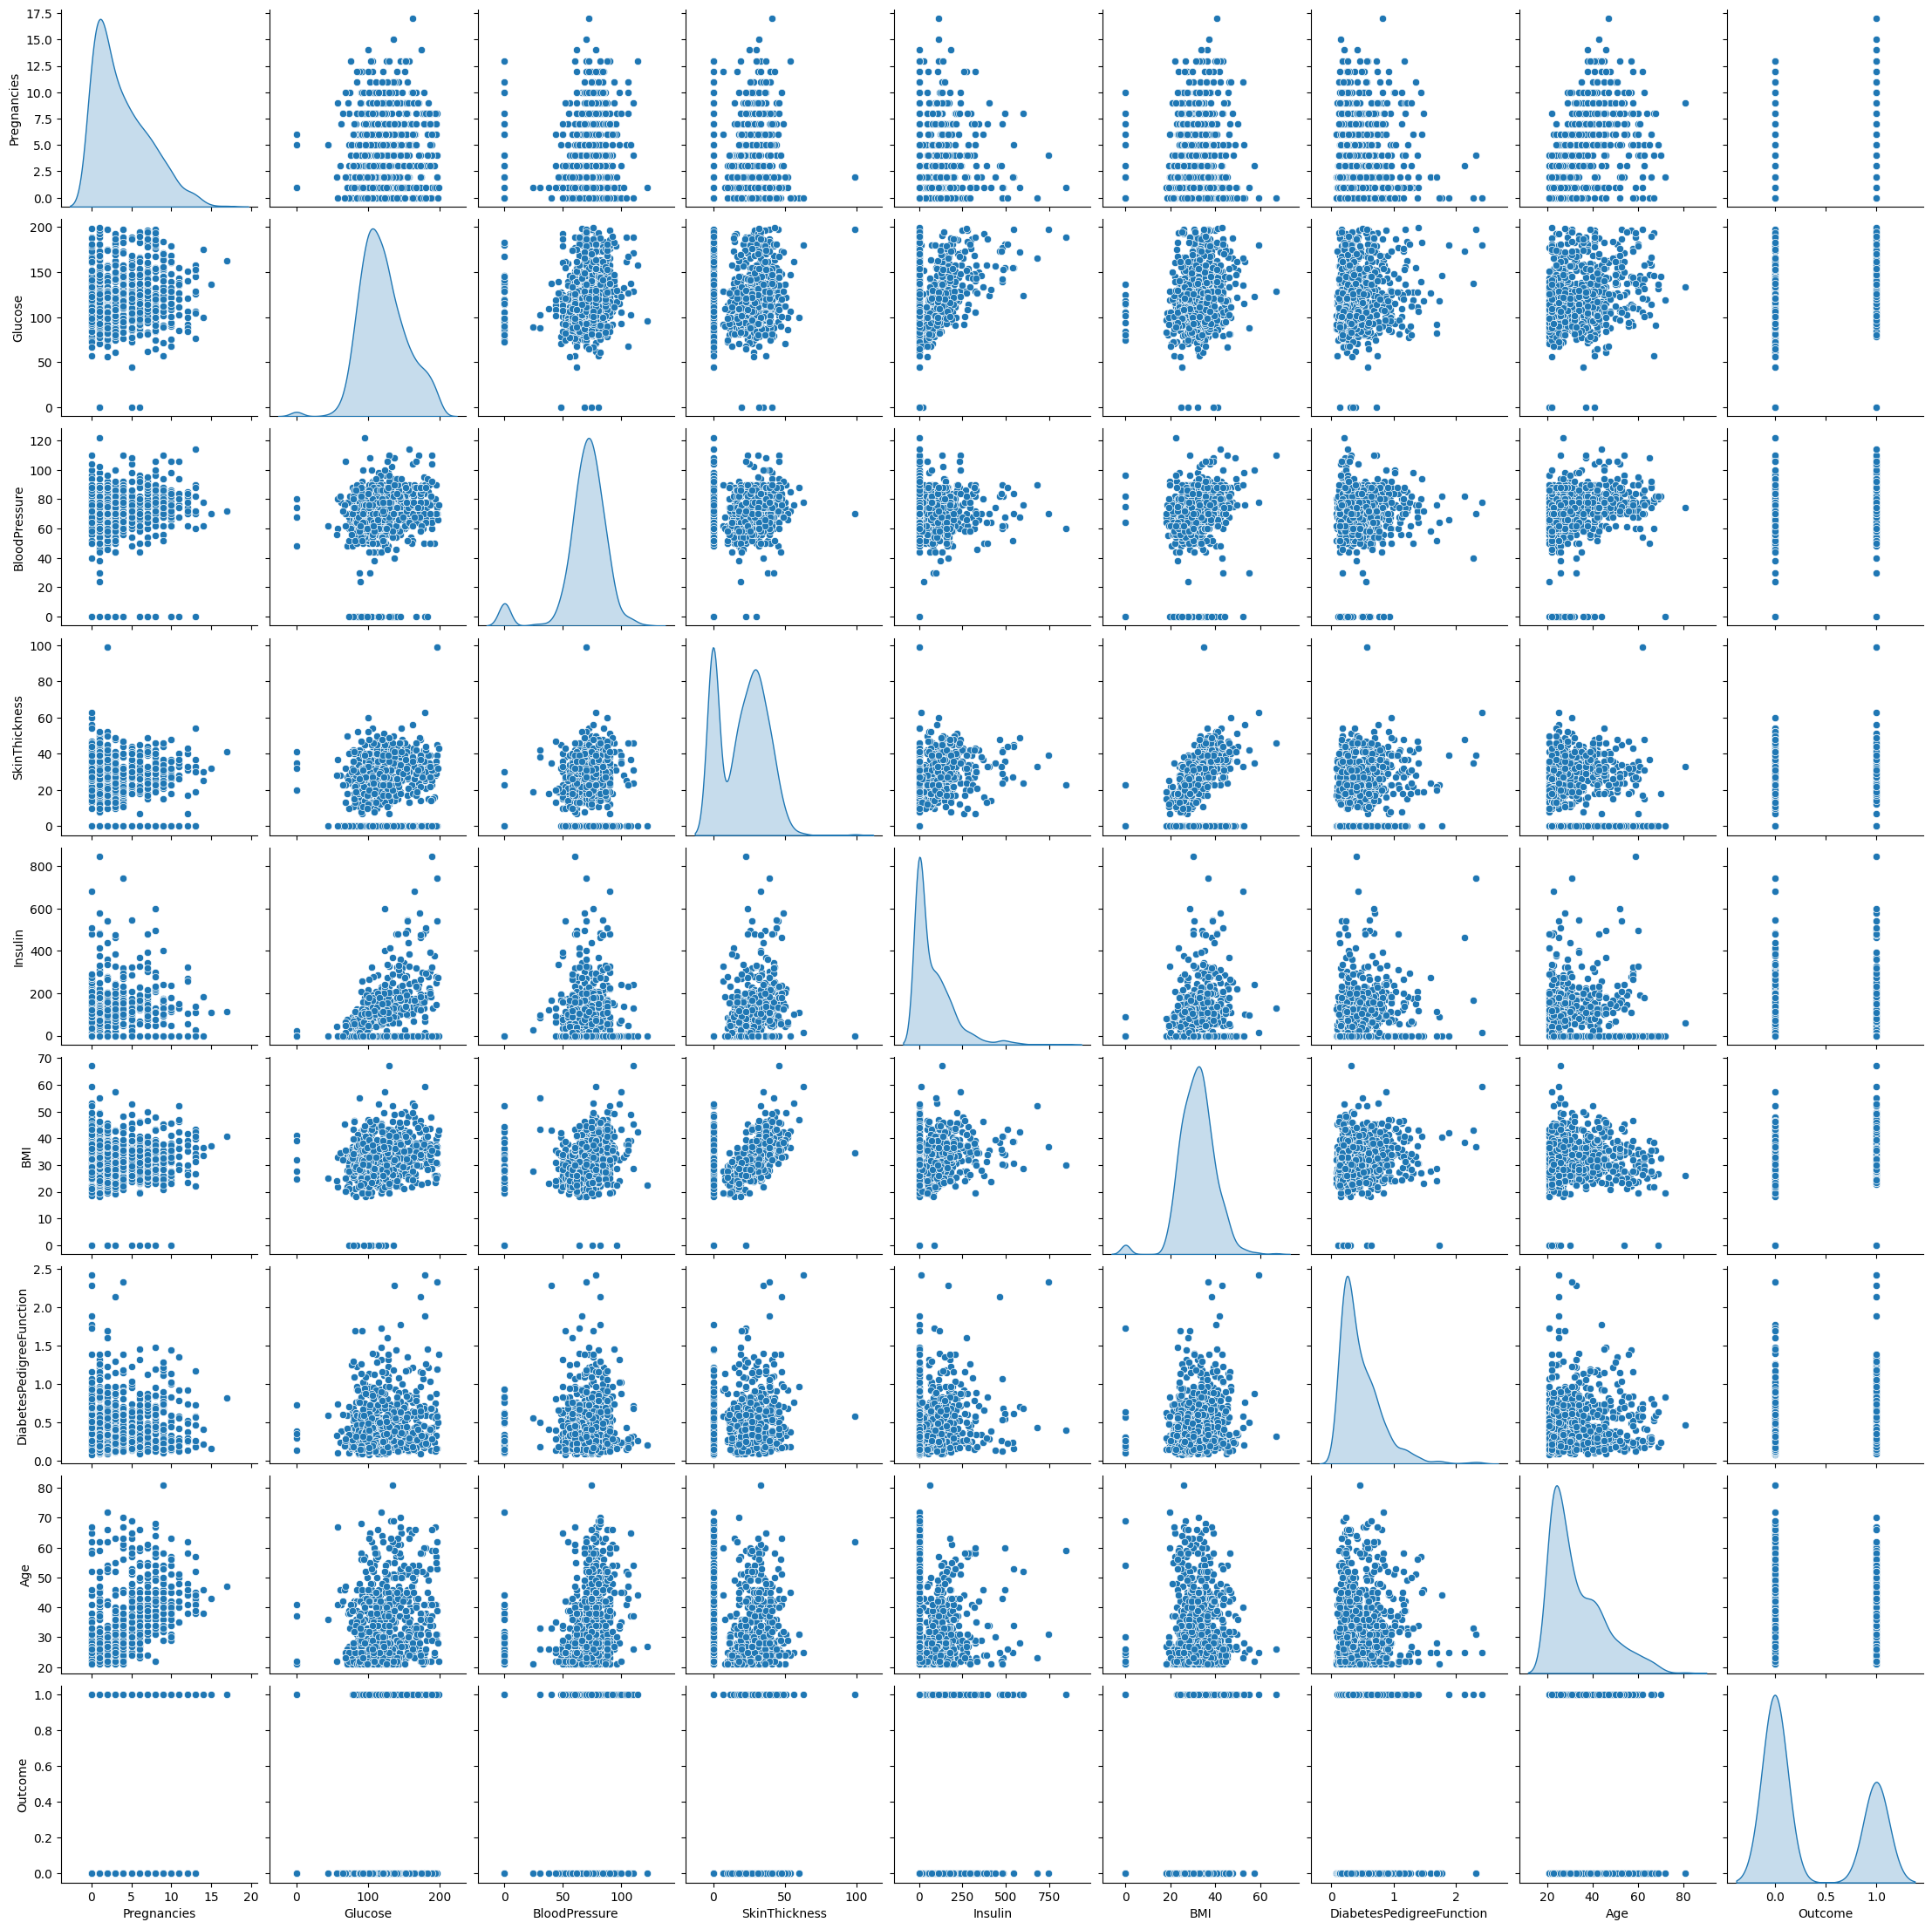

In [14]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [21]:
X = df.drop(columns='Outcome', axis=1) 
Y = df['Outcome']                       

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled  

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, Y_train)  


Y_pred = log_model.predict(X_test) 

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))  

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[120  31]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [40]:
lm = LogisticRegression()
lm.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
lm.coef_


array([[ 0.19420679,  1.12135066, -0.19874949, -0.02462175, -0.10490224,
         0.83809698,  0.13919743,  0.41629124]])

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
tree_pred = tree.predict(X_test)
tree_pred


array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [46]:
Y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

[Text(0.5413318452380952, 0.9666666666666667, 'x[1] <= 1.052\nentropy = 0.934\nsamples = 537\nvalue = [349, 188]'),
 Text(0.20647321428571427, 0.9, 'x[5] <= -0.716\nentropy = 0.823\nsamples = 454\nvalue = [337, 117]'),
 Text(0.37390252976190474, 0.9333333333333333, 'True  '),
 Text(0.0380952380952381, 0.8333333333333334, 'x[1] <= 0.113\nentropy = 0.219\nsamples = 114\nvalue = [110, 4]'),
 Text(0.01904761904761905, 0.7666666666666667, 'x[6] <= 0.615\nentropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.009523809523809525, 0.7, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(0.02857142857142857, 0.7, 'x[6] <= 0.706\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.01904761904761905, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0380952380952381, 0.6333333333333333, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.05714285714285714, 0.7666666666666667, 'x[2] <= -0.6\nentropy = 0.61\nsamples = 20\nvalue = [17, 3]'),
 Text(0.04761904

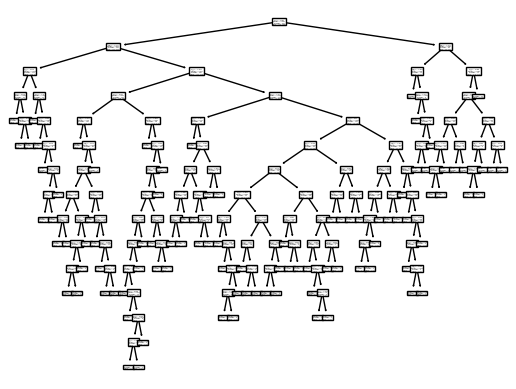

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,tree_pred)
from sklearn.tree import plot_tree
plot_tree(tree)

In [50]:
predictions = lm.predict(X_test)
print(predictions)

[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [52]:
accuracy = accuracy_score(predictions,Y_test)
print(accuracy)

0.7359307359307359


In [53]:
predictions_train = lm.predict(X_train)


In [54]:
accuracy_train = accuracy_score(Y_train,predictions_train)
print(accuracy_train)

0.7821229050279329


In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, predictions))
print("F1 Score:", f1_score(Y_test, predictions))
print("Precision:", precision_score(Y_test, predictions))
print("Recall:", recall_score(Y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))

Accuracy: 0.7359307359307359
F1 Score: 0.6211180124223602
Precision: 0.6172839506172839
Recall: 0.625
Confusion Matrix:
 [[120  31]
 [ 30  50]]


The Logistic Regression model achieved 73.6% accuracy, with an F1 score of 0.62, precision of 0.62, and recall of 0.63.

120 non-diabetic

50 diabetic 

31 non-diabetic as diabetic(Misclassified)

30 diabetic as non-diabetic(Misclassified)


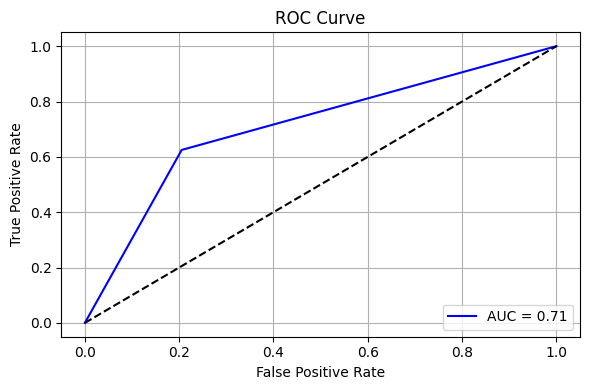

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(Y_test, Y_pred) 
auc = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()